In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.signal import get_window

Tomemos el siguiente enlace: 
* https://flothesof.github.io/FFT-window-properties-frequency-analysis.html
* https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Windowing.ipynb
* https://github.com/unpingco/Python-for-Signal-Processing/blob/master/Windowing_Part2.ipynb

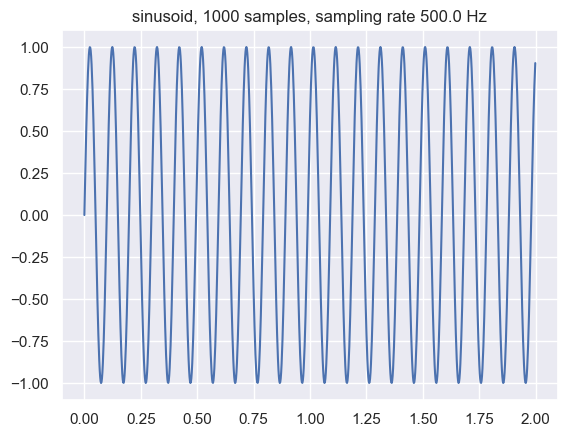

In [4]:
t = np.arange(0, 2, step=1/500)
m = t.size
s = np.sin(2 * np.pi * 10.1 * t)
plt.plot(t, s)
plt.title("sinusoid, {} samples, sampling rate {} Hz".format(m, 1/(t[1] - t[0])))
plt.show()

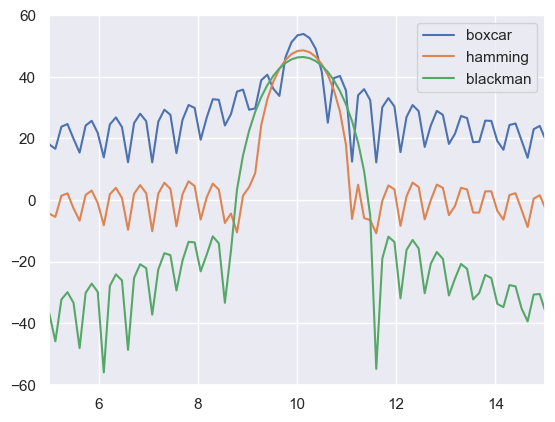

In [7]:
for window in ['boxcar', 'hamming', 'blackman']:
    n = 4096
    w = np.fft.rfft(s * get_window(window, m), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
    plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
plt.ylim(-60, 60)
plt.xlim(5, 15)
plt.legend()

In [8]:
def x(t, amplitude, frequency, phase):
    '''Compute the value of the wave at time t
    with a given amplitude, frequency, and phase offset.
    
    Parameters
    ----------
    t : time in seconds (real number)
    
    amplitude : amplitude scaling (real number)
    
    frequency : cycles per second (real number)
    
    phase : offset in radians (real number)
    '''
    return amplitude * np.cos(2 * np.pi * frequency * t + phase)

In [9]:
# The Audio object allows us to play back sound
# directly in the web browser
from IPython.display import Audio


# We'll use an 8 KHz sampling rate, roughly
# equivalent to telephone quality
fs = 8000

# And generate 1.5 seconds of audio
duration = 1.5

# Total number of samples
# we round it down to a whole number by int(...)
N = int(duration * fs)

# Generate a pure tone at 220 Hz
f0 = 220

# Make an array of sample indices
n = np.arange(N)

# And make the tone, using (n / fs) in place of t
x = np.cos(2 * np.pi * f0 * n / fs)

# How's it sound?
Audio(data=x, rate=fs)

In [1]:
import numpy as np

def ventana_deslizante(signal, window_size, step_size):
    """
    Aplica una ventana deslizante sobre una señal.

    Parámetros:
    -----------
    signal : numpy.array
        La señal a procesar (arreglo 1D).
    window_size : int
        El tamaño de la ventana (en muestras).
    step_size : int
        El tamaño del paso con el que la ventana se desliza (en muestras).

    Retorna:
    --------
    windows : list
        Lista de ventanas generadas a partir de la señal.
    """
    windows = []
    
    # Recorre la señal con pasos de tamaño step_size
    for start in range(0, len(signal) - window_size + 1, step_size):
        # Extrae la ventana actual
        window = signal[start:start + window_size]
        windows.append(window)
    
    return np.array(windows)

# Ejemplo de uso:

# Señal de ejemplo (1000 muestras de una señal senoidal)
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Tiempo (1 segundo)
signal = np.sin(2 * np.pi * 5 * t)  # Señal senoidal de 5 Hz

# Parámetros de la ventana deslizante
window_size = 200  # Tamaño de la ventana (200 muestras)
step_size = 50     # Tamaño del paso (50 muestras)

# Aplicar la ventana deslizante
windows = ventana_deslizante(signal, window_size, step_size)

# Mostrar información de salida
print(f"Se generaron {len(windows)} ventanas con tamaño {window_size} y paso {step_size}.")

Se generaron 17 ventanas con tamaño 200 y paso 50.


In [9]:
list(range(0, len(signal) - window_size + 1, step_size))

[0,
 50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800]

In [10]:
print(len(signal))
print()
print(windows[0][:60])
print()
print(windows[1][:60])

1000

[0.         0.03141076 0.06279052 0.09410831 0.12533323 0.15643447
 0.18738131 0.21814324 0.24868989 0.27899111 0.30901699 0.33873792
 0.36812455 0.39714789 0.42577929 0.4539905  0.48175367 0.50904142
 0.53582679 0.56208338 0.58778525 0.61290705 0.63742399 0.66131187
 0.68454711 0.70710678 0.72896863 0.75011107 0.77051324 0.79015501
 0.80901699 0.82708057 0.84432793 0.86074203 0.87630668 0.89100652
 0.90482705 0.91775463 0.92977649 0.94088077 0.95105652 0.96029369
 0.96858316 0.97591676 0.98228725 0.98768834 0.9921147  0.99556196
 0.99802673 0.99950656 1.         0.99950656 0.99802673 0.99556196
 0.9921147  0.98768834 0.98228725 0.97591676 0.96858316 0.96029369]

[ 1.00000000e+00  9.99506560e-01  9.98026728e-01  9.95561965e-01
  9.92114701e-01  9.87688341e-01  9.82287251e-01  9.75916762e-01
  9.68583161e-01  9.60293686e-01  9.51056516e-01  9.40880769e-01
  9.29776486e-01  9.17754626e-01  9.04827052e-01  8.91006524e-01
  8.76306680e-01  8.60742027e-01  8.44327926e-01  8.27080574e-

## Referencias 1

* https://pysdr.org/content/intro.html
* https://allendowney.github.io/ThinkDSP/
* https://open.umn.edu/opentextbooks/textbooks/290
* https://flothesof.github.io/FFT-window-properties-frequency-analysis.html
* https://github.com/sidneycadot/WindowFunctions/tree/master/python
* https://sensiml.com/documentation/sensiml-python-sdk/additional-tutorials/using-segmentation-algorithms.html
* https://github.com/ermshaua/claspy
* https://safjan.com/automated-trend-detection-and-signal-segmentation/
* https://scikit-maad.github.io/_auto_examples/1_basic/plot_find_rois_simple.html
* https://sensiml.com/documentation/data-studio/python-model-segmentation-algorithm.html


## Referencias 2

* https://github.com/SebastianRestrepoA/EMG-pattern-recognition
* https://github.com/zuhairmhtb/EMGClassificationAlgorithms
* https://neuropsychology.github.io/NeuroKit/functions/emg.html
* https://emgdecompy.readthedocs.io/en/stable/index.html
* https://github.com/sidneycadot/WindowFunctions/blob/master/python/window_functions.py
* https://brianmcfee.net/dstbook-site/content/ch06-dft-properties/Leakage.html
* https://sensiml.com/documentation/sensiml-python-sdk/additional-tutorials/using-segmentation-algorithms.html